In [4]:
# the purpose of this script is to reprocess EEG channel data and use Kmeans for cluster separation

In [5]:
#header files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.io

In [2]:
#import data

In [3]:
eeg01raw = scipy.io.loadmat('EEG01.mat')

In [4]:
eeg01raw.keys()#gets the dict keys

dict_keys(['__header__', '__version__', '__globals__', 'eeg_data_Collection1'])

In [5]:
dataE01 = eeg01raw['eeg_data_Collection1']#gets the data from the dict

In [6]:
type(dataE01)#type is ndarray

numpy.ndarray

In [7]:
#get the left right data from the stim file for trial 1
stim01raw = scipy.io.loadmat('Stim01.mat')

In [8]:
type(stim01raw) #find stims type

dict

In [9]:
stim01raw.keys() #get the keys

dict_keys(['__header__', '__version__', '__globals__', 'StimulusCode_Collection1'])

In [10]:
dataS01 = stim01raw['StimulusCode_Collection1'] #pull out the data into a ndarray

In [11]:
dataS01

array([[0],
       [0],
       [0],
       ..., 
       [1],
       [1],
       [1]], dtype=uint8)

In [12]:
#transpose EEG data into vertical column data rather then row data
#The stim data is already in vertical column form
dataE01_t = np.transpose(dataE01)
dataE01_t

array([[ -960,  -768,  -752, ...,  -672,  -944,   128],
       [  128,   -48,  -192, ...,  -976, -1312,  -528],
       [ -528,  -272,  -224, ...,  -768,  -976,  -480],
       ..., 
       [ -624,  -992, -1408, ...,  -352,  -416,  -816],
       [-1520, -1712, -1936, ...,  -656,  -752, -1088],
       [-2320, -1904, -2112, ..., -1120, -1136, -1088]], dtype=int16)

In [13]:
#now build the eeg and stim data into a single dataframe
#eeg01 = Dataframe([dataS01, dataE01], columns = ['Stim01', '1', '2', '3', '4', '5','6','7','8','9',
#                                                 '10', '11', '12', '13', '14','15', '16', '17', '18',
#                                                 '19', '20', '21', '22'])
eeg01 = pd.DataFrame(dataE01_t)#converts the EEG01 data into a dataframe

In [14]:
#eeg01

In [15]:
#could insert the stim data at the beginning or could leave as is
idx = 0
col_name = 'stim01'
eeg01.insert(idx, column = col_name, value = dataS01)

In [16]:
eeg01

,stim01,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,0,-960,-768,-752,-1200,-624,-608,80,-480,-656,...,0,-496,-976,-688,-768,-336,-496,-672,-944,128
1,0,128,-48,-192,-864,-368,-368,416,-112,-304,...,-1264,-1040,-1408,-1040,-1280,-1168,-768,-976,-1312,-528
2,0,-528,-272,-224,-832,-592,-592,-80,-496,-464,...,-960,-1008,-1296,-656,-848,-800,-624,-768,-976,-480
3,0,-128,160,240,-368,-80,-48,144,256,32,...,-384,-448,-864,-480,-640,-544,-368,-560,-688,-80
4,0,656,208,112,-528,-64,-48,352,208,-240,...,-752,-1264,-1264,-528,-896,-752,-512,-672,-896,-416
5,0,-16,-16,-384,-928,-400,-384,288,-32,-480,...,-720,-784,-912,-272,-864,-624,-192,-352,-768,-368
6,0,-368,-400,-768,-1456,-960,-928,112,-448,-944,...,-784,-256,-960,-544,-928,-640,-288,-480,-816,-288
7,0,-800,-1216,-1232,-1904,-1104,-1088,-48,-864,-1520,...,-320,-1088,-1472,-560,-736,-256,-368,-512,-640,-176
8,0,-560,-736,-864,-1424,-464,-464,496,-528,-1072,...,64,-208,-816,-288,-560,-32,-16,-144,-368,176
9,0,352,48,-64,-816,-128,-128,32,208,-176,...,-144,560,-176,112,-304,240,368,192,-256,352


In [17]:
#plots

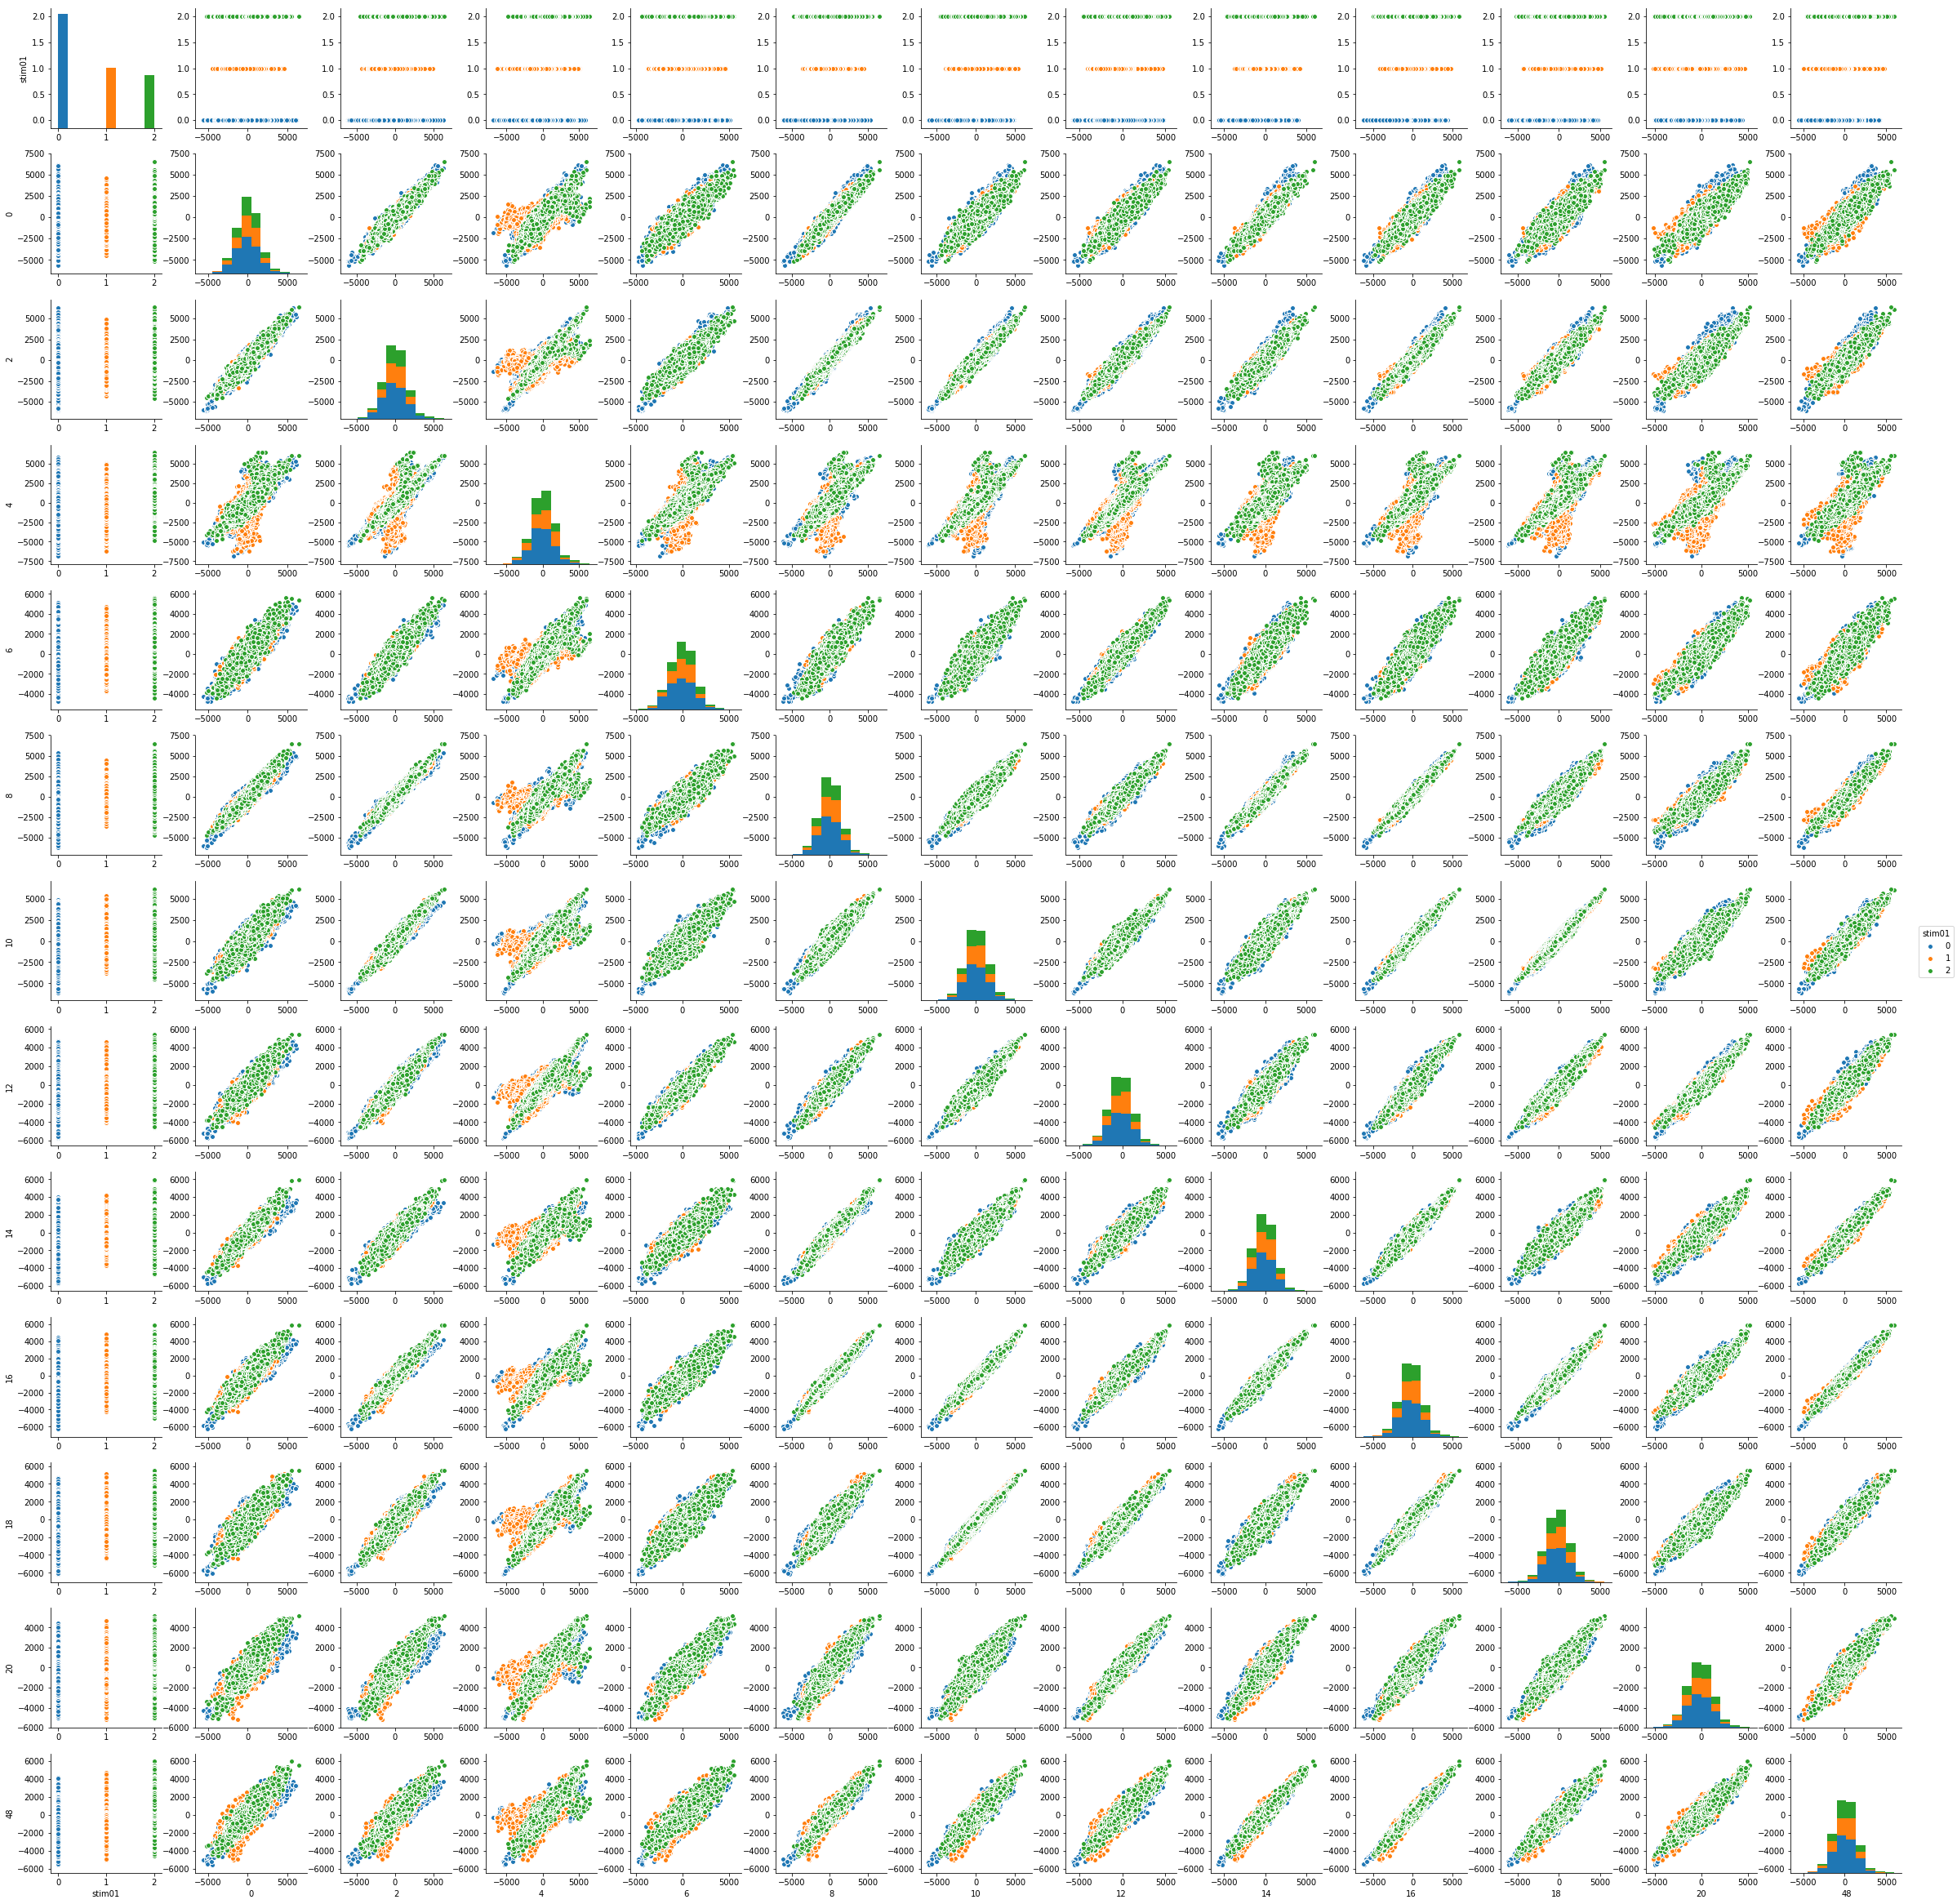

In [101]:
#full number of channels
#eeg01_loc = eeg01.loc[:,['stim01',0,2,4,6,8,10,12,14,16,18,20,48,52,56,58]]#gets the specific columns

#partial number of channels, less computationally rigorous
eeg01_loc = eeg01.loc[:,['stim01',0,2,4,6,8,10,12,14,16,18,20,48]]

#now all of the higher channels, see if anything is as clear as channel 4
#eeg01_loc = eeg01.loc[:,['stim01',12,14,16,18,20,48,52,56,58]]

sns.pairplot(eeg01_loc, hue = 'stim01')

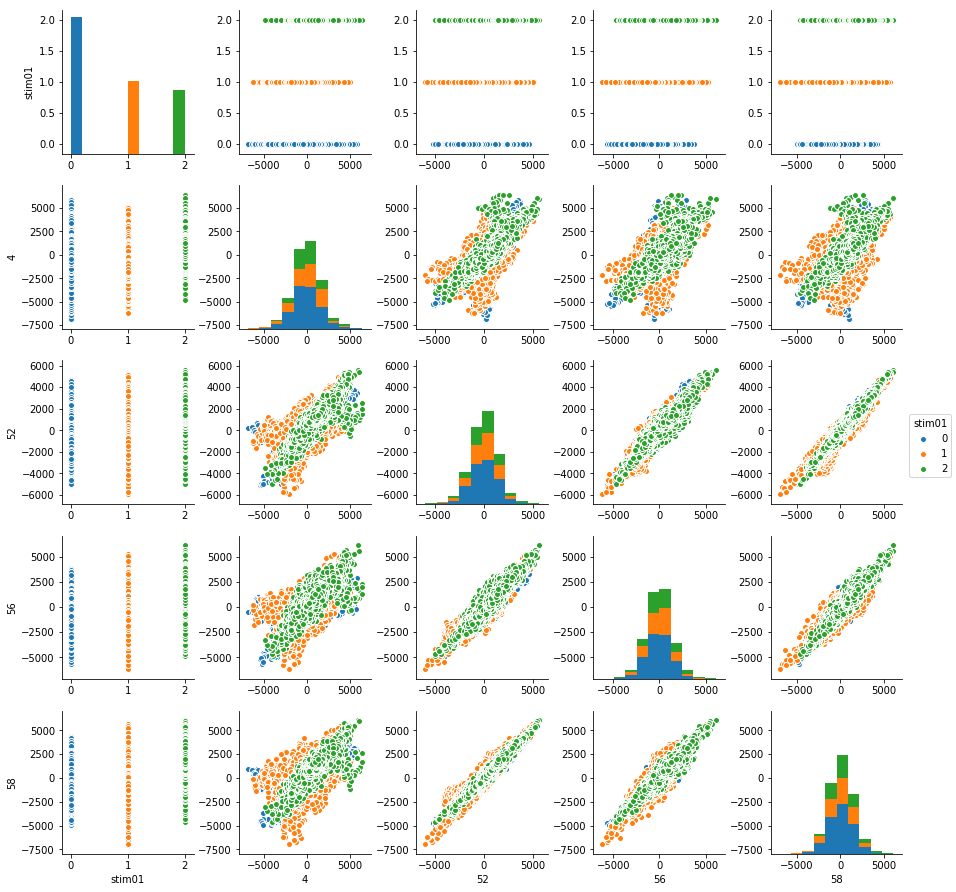

In [26]:
#now all of the higher channels, see if anything is as clear as channel 4
eeg01_loc = eeg01.loc[:,['stim01',4,52,56,58]]

sns.pairplot(eeg01_loc, hue = 'stim01')

In [27]:
#Results: where the overlap between two channels is strong enough to classify
# Channel 4 vs any other channel
# Channels 4 vs 16 gives a good separation between 4 and 16 near (0,0) for grabbing 1s
#Channels 4 vs 14 gives decent separation for both

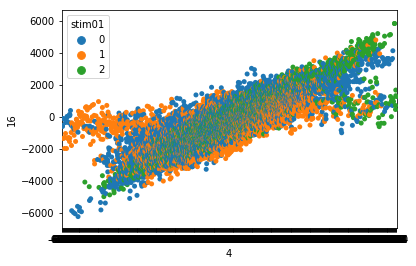

In [102]:
sns.swarmplot(x = 4, y = 16, data = eeg01, hue = 'stim01')

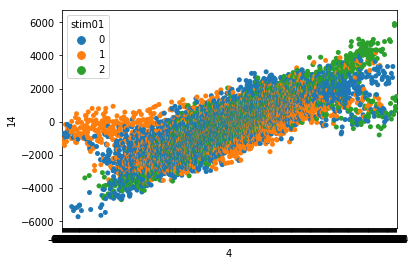

In [103]:
sns.swarmplot(x = 4, y = 14, data = eeg01, hue = 'stim01')

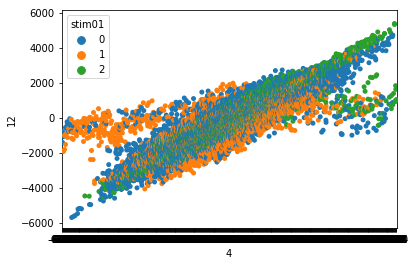

In [104]:
sns.swarmplot(x = 4, y = 12, data = eeg01, hue = 'stim01')

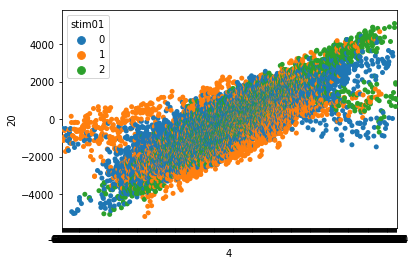

In [105]:
sns.swarmplot(x = 4, y = 20, data = eeg01, hue = 'stim01')

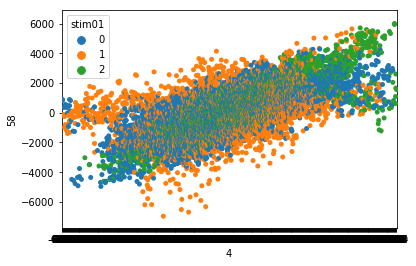

In [106]:
sns.swarmplot(x = 4, y = 58, data = eeg01, hue = 'stim01')

In [18]:
#K means clustering

In [19]:
#sns.swarmplot(x = 4, y = 14, data = eeg01, hue = 'stim01')
#want to use x = 4, y = 14 plot to find the clusters

In [20]:
#import kmeans
from sklearn.cluster import KMeans

In [21]:
#set the predicted number of clusters
#start with 3 because we have three states
kmeans = KMeans(n_clusters = 3)

In [22]:
#dataE01_t is the label-less data
#dataS01 is the labels data

#fit the labelless data:
kmeans.fit(dataE01_t)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
kmeans.cluster_centers_

array([[ 1808.85094972,  1963.53430168,  1870.02994413,  1869.40424581,
         1923.51106145,  1968.54346369,  1622.25340782,  1753.18167598,
         1829.90659218,  1892.7052514 ,  1894.13541899,  1833.20670391,
         1509.6098324 ,  1360.1322905 ,  1455.40648045,  1547.21608939,
         1523.96156425,  1573.09854749,  1527.66212291,  1477.40603352,
         1482.02905028,  1838.18368715,  1658.58324022,  1897.81810056,
         2160.96536313,  2116.65162011,  2051.96156425,  2016.04648045,
         2041.30681564,  1984.36826816,  2187.15173184,  2211.80782123,
         1757.64022346,  1942.62167598,  1933.61162011,  1894.3249162 ,
         1667.71486034,  1604.11173184,  1747.47888268,  1569.91284916,
         1515.20178771,  1458.2596648 ,  1277.37564246,  1351.76581006,
         1414.08178771,  1562.48312849,  1480.80625698,  1610.20067039,
         1676.98234637,  1708.48893855,  1838.8701676 ,  1783.17586592,
         1627.91329609,  1608.89206704,  1641.42480447,  1612.61

In [24]:
kmeans.labels_

array([1, 1, 1, ..., 2, 2, 2])

In [25]:
type(eeg01['stim01'])

pandas.core.series.Series

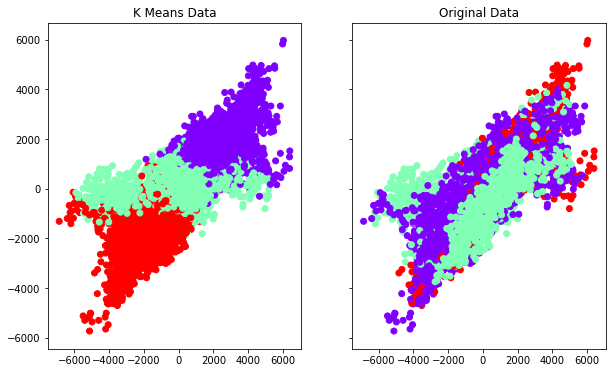

In [49]:
fig , (ax1,ax2) = plt.subplots(1,2,sharey=True, figsize=(10,6))

#this plot uses the kmeans classification data
ax1.set_title('K Means Data')
ax1.scatter(dataE01_t[:,4], dataE01_t[:,14], c = kmeans.labels_, cmap = 'rainbow')
ax1.legend()

#this plot uses the synthetic data
ax2.set_title('Original Data')
ax2.scatter(dataE01_t[:,4], dataE01_t[:,14], c = eeg01['stim01'], cmap = 'rainbow')
ax2.legend()

In [27]:
#now see how we did
#Classifier reports
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(eeg01['stim01'],kmeans.labels_)) 
print(classification_report(eeg01['stim01'],kmeans.labels_))

[[2179 4380 3297]
 [1085 2835 1328]
 [1212 2356 1024]]
             precision    recall  f1-score   support

          0       0.49      0.22      0.30      9856
          1       0.30      0.54      0.38      5248
          2       0.18      0.22      0.20      4592

avg / total       0.36      0.31      0.30     19696



In [34]:
#comes in around 36% precision, 31% recall

In [35]:
####### TESTING DATA

In [36]:
#now try with test data rather than training data, do same process
#pull in the data
eeg02raw = scipy.io.loadmat('EEG02.mat')
stim02raw = scipy.io.loadmat('Stim02.mat')

In [37]:
stim02raw

{'StimulusCode_Collection2': array([[0],
        [0],
        [0],
        ..., 
        [1],
        [1],
        [1]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Oct 15 00:58:37 2018',
 '__version__': '1.0'}

In [38]:
dataE02 = eeg02raw['eeg_data_Collection2']
dataS02 = stim02raw['StimulusCode_Collection2']

In [39]:
dataE02

array([[  800,   832,  1040, ..., -2944, -2608, -2464],
       [   64,   208,   640, ..., -2576, -2480, -2688],
       [  256,   400,   720, ..., -2496, -2480, -2608],
       ..., 
       [ 1088,  1152,  2208, ..., -5264, -6144, -6016],
       [ 1232,  1344,  2128, ..., -5056, -6048, -5920],
       [ 1408,  1392,  2320, ..., -4448, -5040, -5056]], dtype=int16)

In [40]:
#now transpose the data
dataE02_t = np.transpose(dataE02)

In [41]:
eeg02 = pd.DataFrame(dataE02_t) #put into dataframe

In [42]:
eeg02 = pd.DataFrame(dataE02_t)#converts the EEG01 data into a dataframe
#could insert the stim data at the beginning or could leave as is
idx = 0
col_name = 'stim02'
eeg02.insert(idx, column = col_name, value = dataS02)

In [43]:
#create the kmeans model
kmeans2 = KMeans(n_clusters=3)

In [44]:
kmeans2.fit(dataE02_t)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
#See how our classifer does:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(eeg02['stim02'],kmeans2.labels_)) 
print(classification_report(eeg02['stim02'],kmeans2.labels_))

[[2594 3312 3950]
 [1725 1717 1806]
 [1445  917 2230]]
             precision    recall  f1-score   support

          0       0.45      0.26      0.33      9856
          1       0.29      0.33      0.31      5248
          2       0.28      0.49      0.35      4592

avg / total       0.37      0.33      0.33     19696



In [136]:
#gives an output of 37% precision, 33% recall

In [46]:
#could use this to eliminate the values that are predicted to be 0 (the non-movement values)
#at around a 45-50% precision rate.

In [47]:
#now need to try the new data against the original model
#these are the cluster centers from the training set

from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(eeg02['stim02'],kmeans.labels_)) 
print(classification_report(eeg02['stim02'],kmeans.labels_))


[[2179 4380 3297]
 [1064 2859 1325]
 [1233 2332 1027]]
             precision    recall  f1-score   support

          0       0.49      0.22      0.30      9856
          1       0.30      0.54      0.39      5248
          2       0.18      0.22      0.20      4592

avg / total       0.37      0.31      0.30     19696



In [48]:
#the accuracy of the classifer versus novel, previously unused data is
#around 37% for precision and 31% for recall. So the k-means classifier 
#has a decent classification rate considering use of almost direct data
#from the eeg (only mimimal filtering) and more interesting is that the
#the classification of new data to the original model is only slightly
#less accurate than if the classifier was remade for the testing set.
#
#    37% precision vs 37% precision
#    33% recall vs 31% recall
#
#Note: this approach only works if the timings for movement events are the 
#same/similar in both the training and the test set

In [ ]:
#the next thing that could be done might be to increase the numbers of groups
#or go back and change the time signatures, since there is a milliseconds delay
#in the time between initial eeg waveforms inidcating intended movement and the actual movement